In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from linear_quadratic_regulator import LQRSolver
from value_simulator_cons_control import LQR_simulator_cons_control
from linear_Bellman_solver import DGM_net, Bellman_pde, Train
csfont = {'fontname':'Times New Roman'}
plt.rcParams['text.usetex'] = True

In [2]:
##########################################################################################
################################## Initializing the class ################################
##########################################################################################
# LQR setup
T=1.0
H = torch.tensor([[1.0,0],[0,1.0]]) # H,M,D,C,R:  dim = 2*2 
M = torch.tensor([[1.0,0],[0,1.0]])
D = torch.tensor([[0.1,0],[0,0.1]])
C = torch.tensor([[0.1,0],[0,0.1]])
R = torch.tensor([[1.0,0],[0,1.0]])
sigma = torch.tensor([0.05, 0.05]) # sigma: dim = 2 
a = torch.tensor([[1.0, 1.0]]) # constant control

# Initializing the network
net = DGM_net(in_dim = 3, out_dim = 1, n_layers = 3, n_neurons = 50)

# We will train the neural network on [0,1]*[-2,2)*[-2,2)
x1_interval = torch.tensor([-2.0,2.0])
x2_interval = torch.tensor([-2.0,2.0])
Bellman_solver = Bellman_pde(net, x1_interval, x2_interval, H, M, C, D, R, T, sigma, a)

BATCH_SIZE=2**8
train = Train(net, Bellman_solver, BATCH_SIZE)

In [3]:
##########################################################################################
########################################## Training ######################################
##########################################################################################
# Points for testing, uniformally distributed on [0,1)*[-2,2)*[-2,2)
n_points = 100
x1_test = -4 * torch.rand([n_points, 1], dtype=torch.float64) + 2 # x1  uniformly distributed on [-2,2), dim=n_points*1
x2_test = -4 * torch.rand([n_points, 1], dtype=torch.float64) + 2 # x2  uniformly distributed on [-2,2), dim=n_points*1
time = torch.rand([n_points, 1], dtype=torch.float64)
data = torch.cat((time, x1_test, x2_test),dim=1) 
train.train(epoch=10**4, lr=0.0001, data = data)

epoch 49 - lr 0.0001 - loss: 9.347137279040764 - L1 error at epoch 49: 9.435863570810138
epoch 99 - lr 0.0001 - loss: 5.765028608480826 - L1 error at epoch 99: 8.725397669383872
epoch 149 - lr 0.0001 - loss: 3.5989643177071953 - L1 error at epoch 149: 8.164746790210438
epoch 199 - lr 0.0001 - loss: 2.484055658739986 - L1 error at epoch 199: 7.801621902408891
epoch 249 - lr 0.0001 - loss: 2.0020898813216554 - L1 error at epoch 249: 7.49671227951427
epoch 299 - lr 0.0001 - loss: 1.6663419033760911 - L1 error at epoch 299: 7.280048144899329
epoch 349 - lr 0.0001 - loss: 1.382910556353833 - L1 error at epoch 349: 7.0669276149506715
epoch 399 - lr 0.0001 - loss: 1.2120197250683886 - L1 error at epoch 399: 6.857501665450936
epoch 449 - lr 0.0001 - loss: 1.015219496749663 - L1 error at epoch 449: 6.690005696525122
epoch 499 - lr 0.0001 - loss: 0.8640244769823622 - L1 error at epoch 499: 6.515064048890657
epoch 549 - lr 0.0001 - loss: 0.7181864433501304 - L1 error at epoch 549: 6.3453150787545

epoch 4399 - lr 0.0001 - loss: 0.0012786355539803032 - L1 error at epoch 4399: 4.113234626360693
epoch 4449 - lr 0.0001 - loss: 0.0012779986940145236 - L1 error at epoch 4449: 4.112045035666219
epoch 4499 - lr 0.0001 - loss: 0.001241716377027296 - L1 error at epoch 4499: 4.104545255941684
epoch 4549 - lr 0.0001 - loss: 0.0011680659493689225 - L1 error at epoch 4549: 4.092498431275831
epoch 4599 - lr 0.0001 - loss: 0.0011870100988365935 - L1 error at epoch 4599: 4.097043303663847
epoch 4649 - lr 0.0001 - loss: 0.0010503421338560097 - L1 error at epoch 4649: 4.090520782169946
epoch 4699 - lr 0.0001 - loss: 0.001101929069517628 - L1 error at epoch 4699: 4.08819628590972
epoch 4749 - lr 0.0001 - loss: 0.0010110754988501272 - L1 error at epoch 4749: 4.079507628461977
epoch 4799 - lr 0.0001 - loss: 0.0010170964586064689 - L1 error at epoch 4799: 4.078210118826187
epoch 4849 - lr 0.0001 - loss: 0.0010134954096870793 - L1 error at epoch 4849: 4.071930850053036
epoch 4899 - lr 0.0001 - loss: 0.

epoch 8649 - lr 0.0001 - loss: 0.0002648572311210945 - L1 error at epoch 8649: 3.8449764651575253
epoch 8699 - lr 0.0001 - loss: 0.0002242718403793725 - L1 error at epoch 8699: 3.8464391238721447
epoch 8749 - lr 0.0001 - loss: 0.00023263659559024158 - L1 error at epoch 8749: 3.8448234962528933
epoch 8799 - lr 0.0001 - loss: 0.0002135040768996859 - L1 error at epoch 8799: 3.845193811601248
epoch 8849 - lr 0.0001 - loss: 0.0002114358243344062 - L1 error at epoch 8849: 3.841110944465656
epoch 8899 - lr 0.0001 - loss: 0.00020474292408365747 - L1 error at epoch 8899: 3.8387757002789575
epoch 8949 - lr 0.0001 - loss: 0.00020223159243850538 - L1 error at epoch 8949: 3.8377829515541144
epoch 8999 - lr 0.0001 - loss: 0.00021879722616889097 - L1 error at epoch 8999: 3.8369492644052308
epoch 9049 - lr 0.0001 - loss: 0.0001950741420690066 - L1 error at epoch 9049: 3.8314717406128853
epoch 9099 - lr 0.0001 - loss: 0.00019247638902858505 - L1 error at epoch 9099: 3.8319377893944324
epoch 9149 - lr 0

In [4]:
torch.save(net,'net_model.pkl')
errors = train.get_errors()

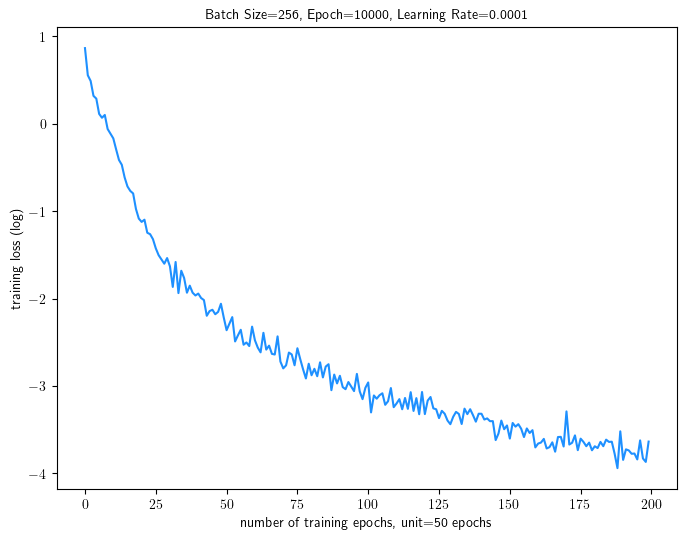

In [5]:
##########################################################################################
############################# Log plot of the training loss ##############################
##########################################################################################
fig = plt.figure(figsize=(8,6))
plt.plot(np.log10(errors[0]), color = 'dodgerblue', label='Errors')
plt.title(f'Batch Size={BATCH_SIZE}, Epoch=10000, Learning Rate=0.0001', fontsize=10)
plt.xlabel('number of training epochs, unit=50 epochs')
plt.ylabel('training loss (log)')
plt.show()

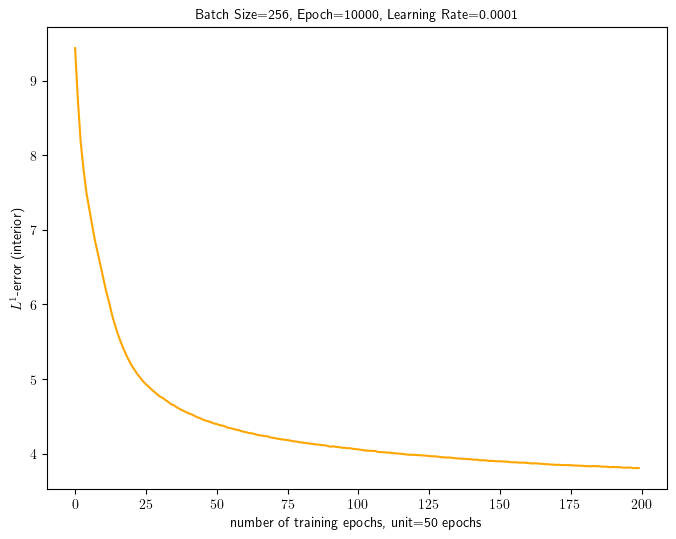

In [6]:
##########################################################################################
######################### L1-error against the Monte Carlo simulation ####################
##########################################################################################
fig = plt.figure(figsize=(8,6))
plt.plot(errors[1], color = 'orange', label='L1-error')
plt.title(f'Batch Size={BATCH_SIZE}, Epoch=10000, Learning Rate=0.0001', fontsize=10)
plt.xlabel('number of training epochs, unit=50 epochs')
plt.ylabel(r'$L^{1}$-error (interior)')
plt.show()

In [7]:
##########################################################################################
##################### Testing the trained neural network in the interior #################
##########################################################################################
simulator = LQR_simulator_cons_control(T, H, M, C, D, R, sigma)
size = 100 
sample_interior = torch.cat((torch.rand(size,1,dtype=torch.float64),-4*torch.rand(size,2,dtype=torch.float64)+2),dim=1)
value_interior_MC = simulator.val_sim(sample_interior[:,0], sample_interior[:,1:].unsqueeze(1), 1000, 5000).numpy().flatten()
value_interior_net = net(sample_interior).detach().cpu().numpy().flatten()
error_interior = value_interior_MC-value_interior_net

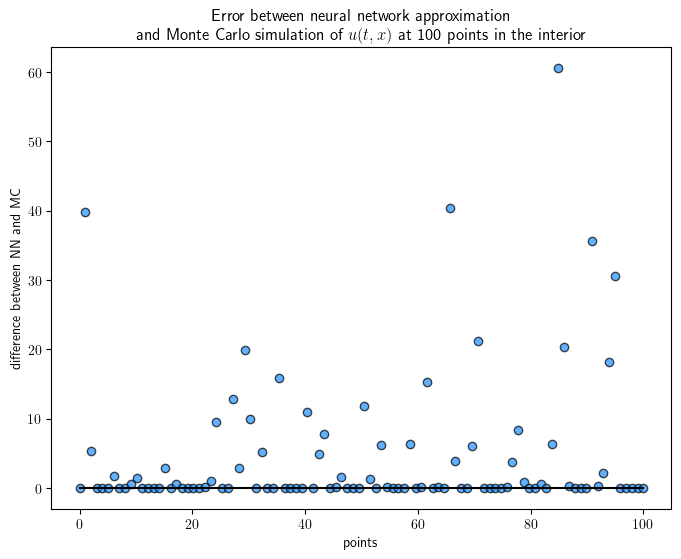

In [8]:
# Plot the error
fig = plt.figure(figsize=(8,6))
plt.scatter(np.linspace(0,len(value_interior_MC),len(value_interior_MC)), error_interior, color='dodgerblue', alpha=0.7, marker='o',edgecolor='black')
x_plot = np.linspace(0,len(value_interior_MC),len(value_interior_MC))
plt.plot(x_plot, np.zeros(len(x_plot)), color='black')
plt.title(r'Error between neural network approximation' '\n' ' and Monte Carlo simulation of $u(t,x)$ at 100 points in the interior', **csfont)
plt.xlabel('points', **csfont)
plt.ylabel('difference between NN and MC', **csfont)
plt.show()

In [9]:
##########################################################################################
##################### Testing the trained neural network on the boundary #################
##########################################################################################
sample_boundary = torch.cat((torch.ones(size,1,dtype=torch.float64),-4*torch.rand(size,2,dtype=torch.float64)+2),dim=1)
value_boundary_MC = simulator.val_sim(sample_boundary[:,0], sample_boundary[:,1:].unsqueeze(1), 1000, 5000).numpy().flatten()
value_boundary_net = net(sample_boundary).detach().cpu().numpy().flatten()
error_boundary = value_boundary_MC-value_boundary_net

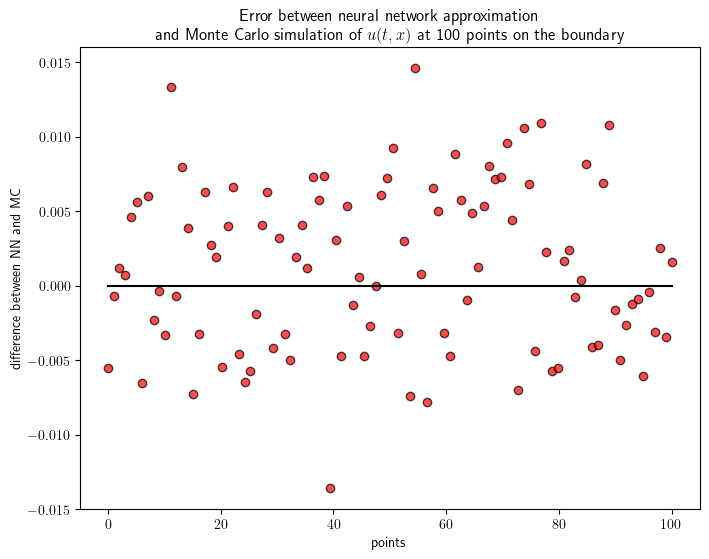

In [10]:
# Plot the error
fig = plt.figure(figsize=(8,6))
plt.scatter(np.linspace(0,len(value_boundary_MC),len(value_boundary_MC)), error_boundary, color='red', alpha=0.7, marker='o',edgecolor='black')
x_plt = np.linspace(0,len(value_boundary_MC),len(value_boundary_MC))
plt.plot(x_plt, np.zeros(len(x_plt)), color='black')
plt.title(r'Error between neural network approximation' '\n' ' and Monte Carlo simulation of $u(t,x)$ at 100 points on the boundary', **csfont)
plt.xlabel('points', **csfont)
plt.ylabel('difference between NN and MC', **csfont)
plt.show()